In [1]:
from integrate import integral
import numpy as np
from matplotlib import pyplot as plt
import astropy.units as u
from PartDist import ExpCutOffPL
from PartDist import PowerLaw
from grid import grid

In [4]:
#@u.quantity_input
#def myfunction(myangle: u.Quantity[u.arcsec]):
#    return myangle**2

In [2]:
def SynchEm(part_dist,E,Egam,B):
    #definindo constantes em cgs
    e = 4.8032e-10  #carga do elétron
    me = 9.1094e-28 #massa do elétron
    h = 6.6261e-27  #constante de planck
    c = 2.9979e10  #velocidade de luz
    #cálculo do termo fora da integral
    factor1 = 1.85*np.sqrt(2)*e**3*B
    factor2 = h*me*c**2
    #calculando a integral
    #definindo limites da integral
    Emin, Emax = E[0], E[-1]
    #definindo função que será integrada
    Lgam = np.zeros_like(Egam)
    for i in range(len(Egam)):
        def integ(epsilon):
            #cálculando energia crítica
            Ec = (3 * e * h * np.sqrt(2/3) * B * epsilon**2) / (4 * np.pi * me**3 * c**5)
            return part_dist(epsilon)*(Egam[i]/Ec)**(1/3)*np.exp(-Egam[i]/Ec)    
        Integral_val,error = integral(Emin,Emax,integ)
        Lgam[i] = factor1/factor2*Integral_val
    return Lgam

In [30]:
particles = PowerLaw(1.,7/3)
#criando grid the energia
ev_erg = 1.6*10**(-12) #erg
E = grid(1.e-3,1.e12,1000)
Egam = E
E_erg = E*ev_erg
Egam_erg = Egam*ev_erg
#calculando emissão
L = SynchEm(particles,E_erg,Egam_erg,1e-3)

In [31]:
Egam

array([1.00000000e-03, 1.03514217e-03, 1.07151931e-03, ...,
       9.33254301e+11, 9.66050879e+11, 1.00000000e+12], shape=(1001,))

In [32]:
L

array([20457.14208553, 19991.46772487, 19536.39325678, ...,
           0.        ,     0.        ,     0.        ], shape=(1001,))

(1e-14, np.float64(1.3974333563515027e+20))

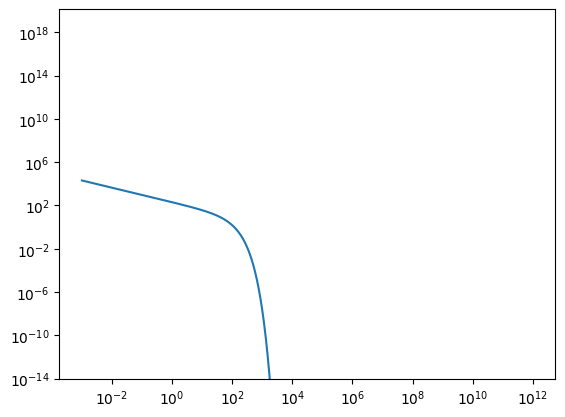

In [33]:
#PLOT

plt.loglog(Egam,L)
plt.ylim(1e-14)

**Alterando Ec para tentar resolver problema numérico**

In [45]:
def Distribuição_teste(norm, alpha):

    """
    Creates a particle distribution function following a power-law.

    Parameters:
        norm (float): Normalization constant of the distribution.
        alpha (float): Spectral index of the power law.

    Returns:
        function (callable): A function that computes the particle distribution for a given energy E.
    """
    #creating a function factory:
    def distribution(u):
        #calculating the distribution of particles according to a power law
        if u <= 0:
            raise ValueError("E must be positive.")
        return norm * u**(-alpha/2)
    return distribution

In [46]:
u = E_erg**2
part_dist = Distribuição_teste(1.,7/3)
B = 1e-3
e = 4.8032e-10  #carga do elétron
me = 9.1094e-28 #massa do elétron
h = 6.6261e-27  #constante de planck
c = 2.9979e10  #velocidade de luz

In [48]:
#calculando a integral
#definindo limites da integral
umin, umax = u[0], u[-1]
#definindo função que será integrada
integrando = np.zeros_like(Egam)
for i in range(len(Egam)):
    def integ(epsilon):
        #cálculando energia crítica
        Ec = (3 * e * h * np.sqrt(2/3) * B * epsilon) / (4 * np.pi * me**3 * c**5)
        return part_dist(epsilon)*(Egam[i]/Ec)**(1/3)*np.exp(-Egam[i]/Ec)    
    Integral_val,error = integral(umin,umax,integ)
    integrando[i] = Integral_val

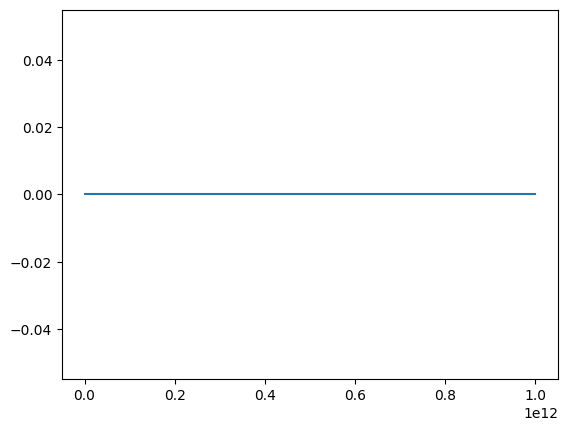

In [51]:
plt.plot(Egam,integrando)

**Caso Analítico:** $\alpha = 7/3$, $N(E) = E^{-\alpha}$


In [34]:
e = 4.8032e-10  #carga do elétron
m = 9.1094e-28 #massa do elétron
h = 6.6261e-27  #constante de planck
c = 2.9979e10  #velocidade de luz
B = 1e-3
Egamma = Egam_erg
Emax = E_erg[-1]
Emin = E_erg[0]
a = 3.7/3**(1/6)*e**(8/3)*B**(2/3)/(h**(4/3)*c**(1/6)*np.pi**(1/3))
sig = np.sqrt(8/3)*(m**3*c**5)/(e*h*B)
Lgam = a/(2*Egamma**(2/3)*sig)*(np.exp(-Egamma*sig /Emax**2)-np.exp(-Egamma*sig /Emin**2))

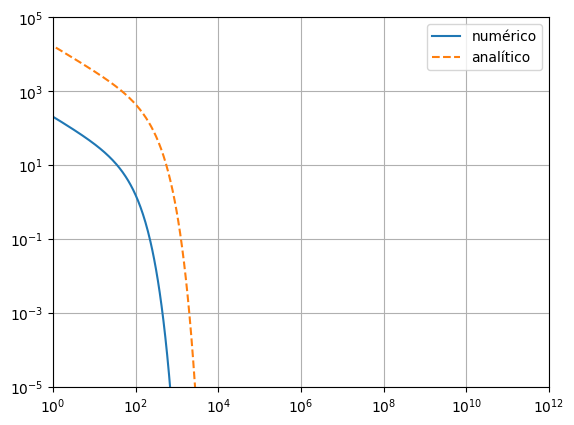

In [38]:
plt.loglog(Egam,L,label= 'numérico')
plt.loglog(Egam,Lgam, linestyle = '--',label = 'analítico')
plt.legend()
plt.grid()
plt.ylim(1e-5,1e5)
plt.xlim(1,1e12)
plt.show()

In [107]:
#analisando comportamento do integrando:

#integrando = np.zeros_like(Egamma)
##for i in range(len(Egamma)):
 #   def integ(E):
 #       #cálculando energia crítica
 #       Ec = (3 * e * h * np.sqrt(2/3) * B * E**2) / (4 * np.pi * m**3 * c**5)
 #       return particles(E)*(Egamma[i]/Ec)**(1/3)*np.exp(-Egamma[i]/Ec)
 #   Integral_val,error = integral(Emin,Emax,integ)
 #   integrando[i] = Integral_val
 #   Ec_test = (3 * e * h * np.sqrt(2/3) * B * Emax**2) / (4 * np.pi * m**3 * c**5)


In [108]:
#plt.loglog(Egamma,integrando)
#plt.ylim(1e-14)
#plt.xlim(1e-12,1e-10)

In [109]:
#analisando comportamento do integrando:
#Emin = 0
#Emax = 1e-20
#integrando = np.zeros_like(Egamma)
#for i in range(len(Egamma)):
#    def integ(E):
#        #cálculando energia crítica
#        Ec = (3 * e * h * np.sqrt(2/3) * B * E**2) / (4 * np.pi * m**3 * c**5)
#        return particles(E)*(Egamma[i]/Ec)**(1/3)*np.exp(-Egamma[i]/Ec)
#    Integral_val,error = integral(Emin,Emax,integ)
#    integrando[i] = Integral_val
#    Ec_test = (3 * e * h * np.sqrt(2/3) * B * Emax**2) / (4 * np.pi * m**3 * c**5)

In [110]:
#plt.plot(Egamma,integrando)
#plt.ylim(1e-2,10)
#plt.xlim(1e-12,1e-10)

In [9]:
#print(integrando)